In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
n = 10 # 개별 주식 수
dates = pd.date_range(start='1963-07-01', end='1990-12-31', freq='ME')
returns = pd.DataFrame(
    {f"Stock{i}": np.random.uniform(-0.05, 0.05, dates.shape[0]) 
    for i in range(n)})
print("The number of dates:", dates.shape)
print("Sample of dates:", dates[:3])
print("Sample of returns:")
returns.iloc[0], sum(returns.iloc[0])

The number of dates: (330,)
Sample of dates: DatetimeIndex(['1963-07-31', '1963-08-31', '1963-09-30'], dtype='datetime64[ns]', freq='ME')
Sample of returns:


(Stock0   -0.012546
 Stock1   -0.014403
 Stock2   -0.014390
 Stock3    0.029942
 Stock4   -0.025290
 Stock5   -0.046384
 Stock6   -0.031390
 Stock7    0.000741
 Stock8   -0.020195
 Stock9   -0.011948
 Name: 0, dtype: float64,
 -0.1458627708026218)

In [4]:
portfolio_returns = returns.sum(axis=1)
portfolio_returns

0     -0.145863
1      0.079771
2      0.027897
3     -0.031464
4     -0.171288
         ...   
325    0.053163
326   -0.013154
327    0.041123
328    0.043548
329    0.059648
Length: 330, dtype: float64

In [5]:
rolling_window = 5 * 12  # 5년 * 12개월 = 60개월
min_periods = 2 * 12 # 최소 24개월

rolled = portfolio_returns.rolling(
    window=rolling_window, min_periods=min_periods).mean()
nan = rolled.isna().sum()
print(rolled.shape, nan)
portfolio_rolled_returns = rolled
rolled

(330,) 23


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
325   -0.019007
326   -0.020310
327   -0.020502
328   -0.018020
329   -0.015240
Length: 330, dtype: float64

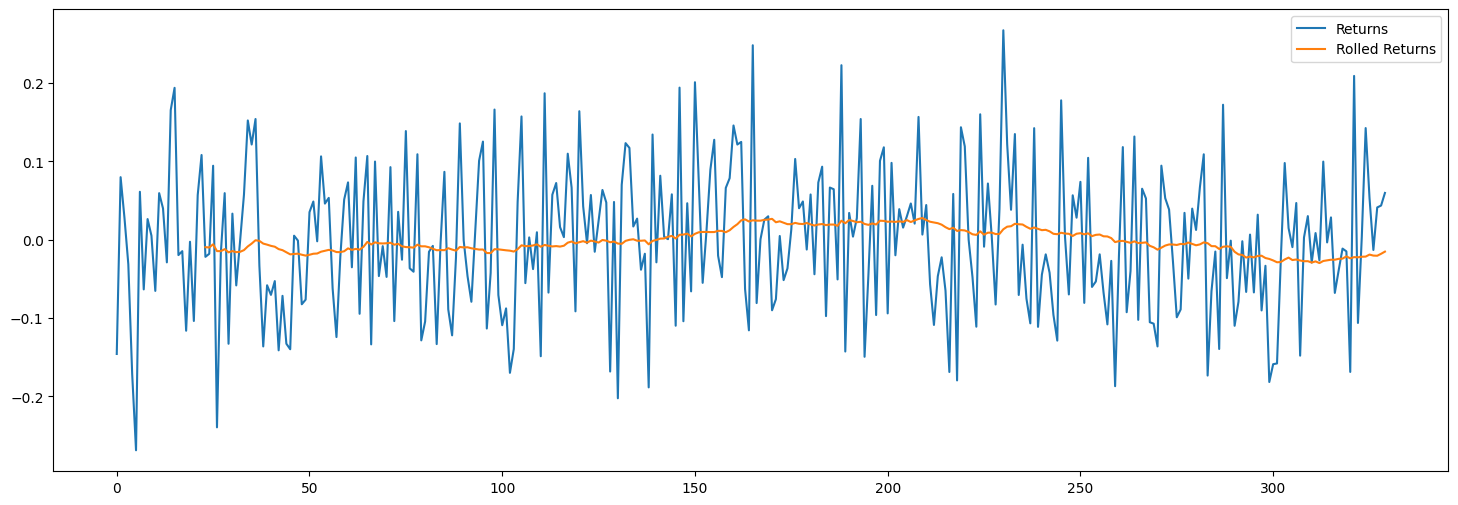

In [6]:
plt.figure(figsize=(18, 6))

sns.lineplot(data=portfolio_returns, label="Returns")
sns.lineplot(data=portfolio_rolled_returns, label="Rolled Returns")
plt.legend()